In [1]:
import micropolarray as ml
import numpy as np
from pathlib import Path


# Image initialization

In [2]:
# create a test image if it's not there
if not Path("./tests/image.fits").exists():
    ml.MicropolImage(np.ones(shape=(16, 16))).save_as_fits(
        "./tests/image.fits"
    )

micropolimage_from_file = ml.MicropolImage("./tests/image.fits")

micropolimage_from_nparray = ml.MicropolImage(np.ones(shape=(16, 16)))

image = ml.MicropolImage(micropolimage_from_nparray)


WARNING - 2023-09-27 12:40:53,435 - Micropolarizer orientation dictionary defaults to {0: 0, 45: 1, -45: 2, 90: 3}, set it via set_default_angles(camera)



# Plotting

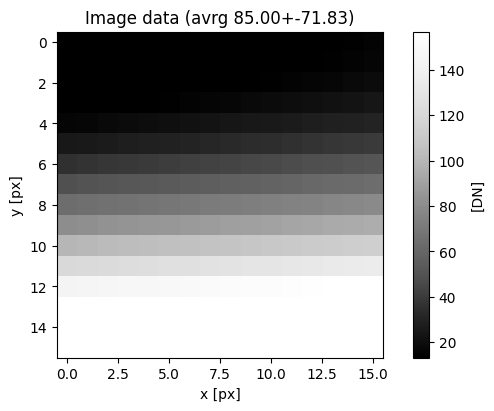

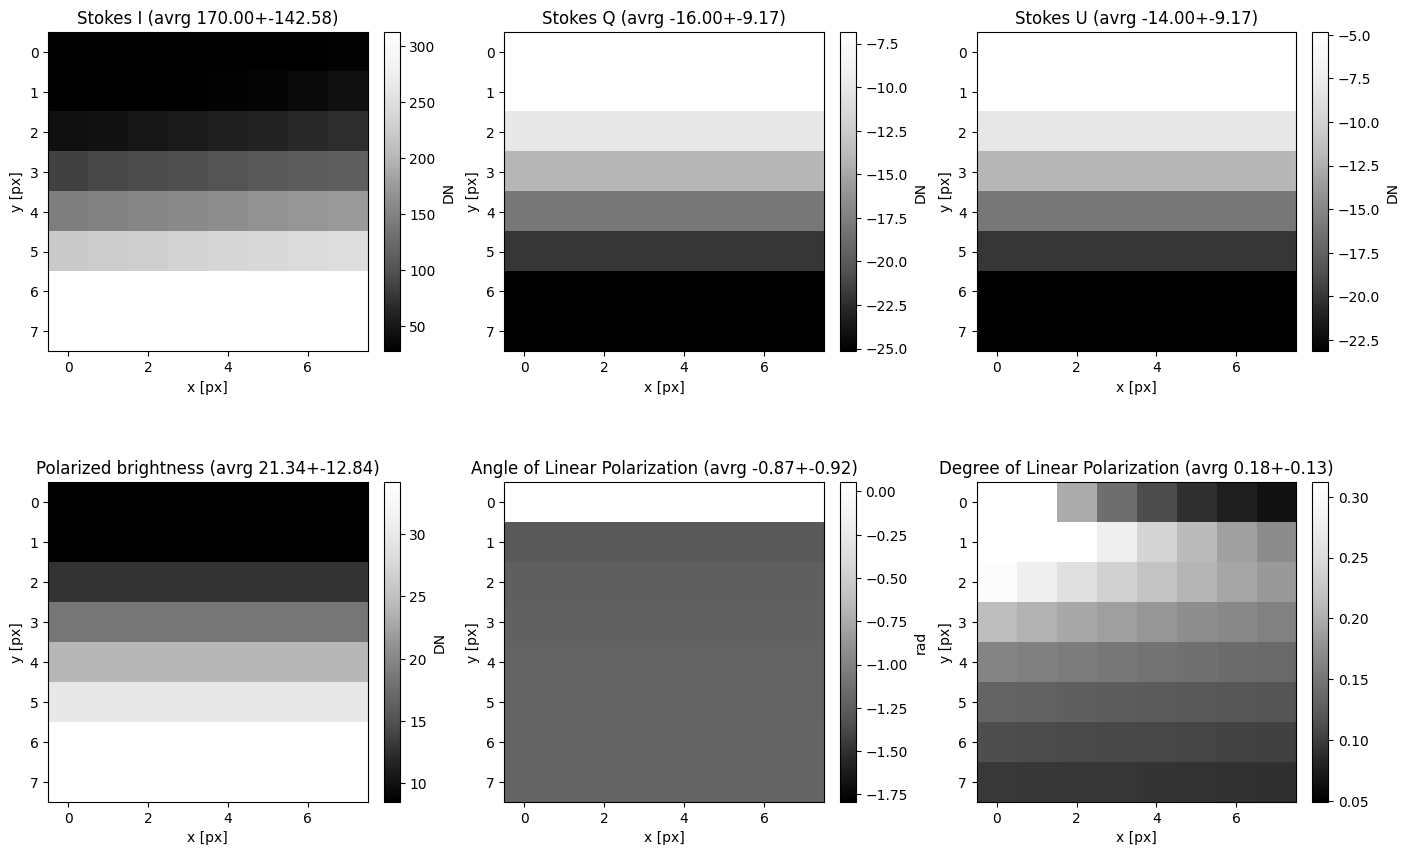

In [3]:
fig, ax, fig2, ax2 = micropolimage_from_file.show_with_pol_params()
# output are matplotlib figures/axes
fig.set_dpi(100)
fig2.set_dpi(100)


# Retrieve polarization informations

In [4]:
image = (
    micropolimage_from_file + micropolimage_from_nparray + 1
)  # operations are possible

print(image.header)  # print header information

angle_of_linear_pol = image.AoLP.data  # 8x8 linear pol angle
print(np.mean(angle_of_linear_pol))

(
    Stokes_I,
    Stokes_Q,
    Stokes_U,
) = image.Stokes_vec  # Get the stokes vector components as np.ndarray
print(Stokes_I)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16                                                  NAXIS2  =                   16                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# Rebin, demosaic, demodulate

INFO - 2023-09-27 12:41:09,225 - Demosaicing (adjacent method)...


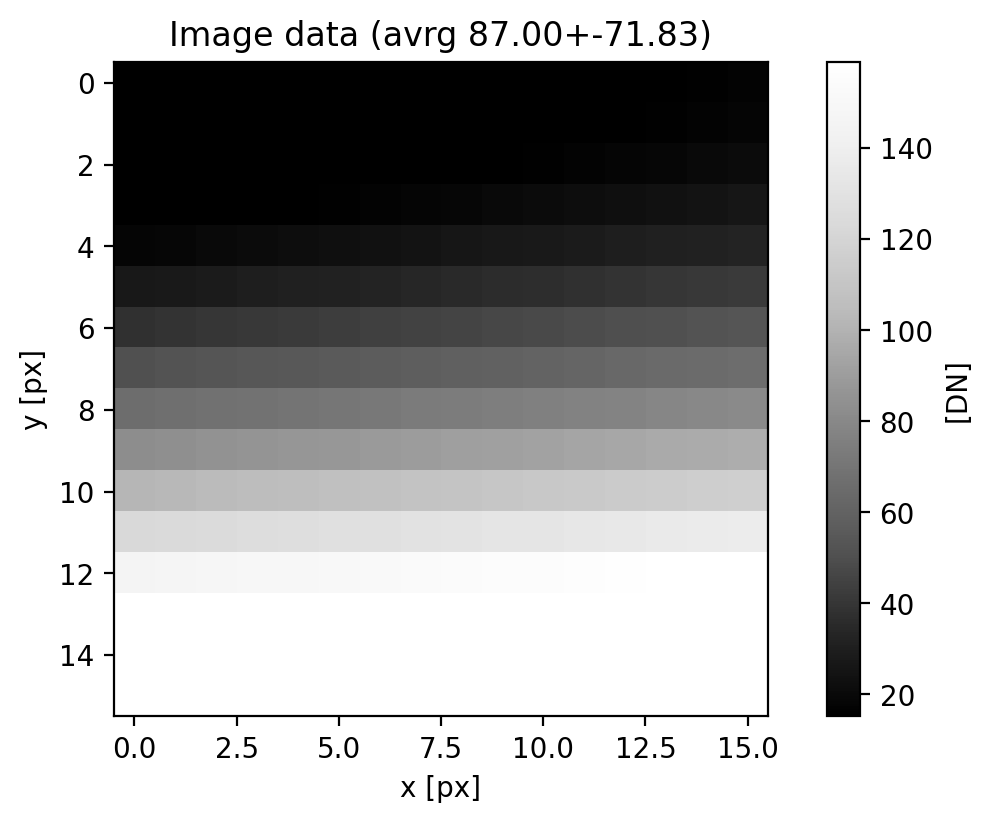

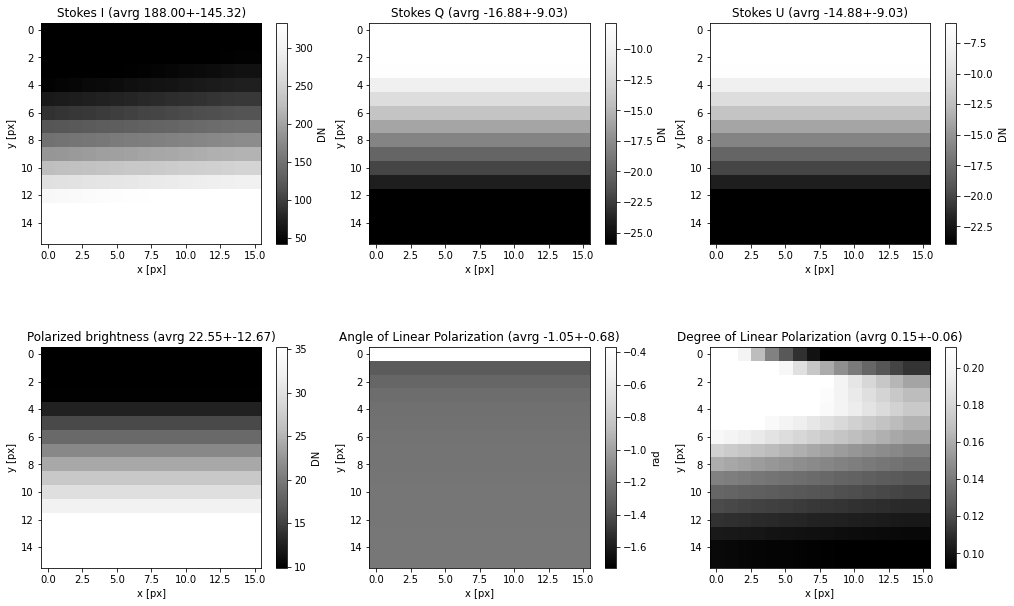

In [7]:
binned_image = image.rebin(binning=2)  # 2x2 binning: (16,16) -> (8,8) data

demosaiced_image = image.demosaic()  # parameters now are (16, 16) arrays
fig, ax, fig2, ax2 = demosaiced_image.show_with_pol_params()

# example of demodulation if demodulation matrices are available
# demodulator_object = ml.Demodulator("put/demodulation/folder/here")
# demodulated_image = image.demodulate(demodulator=demodulator_object)
